# Assignment 1 Amazon Review Dataset

7130ICT - Data Analytics

Trimester 1 - 2021

s5172620 - Julio Pimentel Albores

s5198626 - Gabriela Almeida Monteiro

Due: Friday, 28 May 2021

## Table of contents
* [Part 1 –Basic analysis](#part1)

    * [1.1) Exploring electronics dataset](#part1.1)
        * [1.1.1) Data cleaning](#part1.1.1)
        * [1.1.2) Creation of Tablet dataset](#part1.1.2)
    * [1.2) Exploring Tablet dataset](#part1.2)
        * [1.2.1) Filtering accessories](#part1.2.1)
        * [1.2.2) Data cleaning of Tablet dataset](#part1.2.2)
        * [1.2.3) Descriptive statistics of Tablet dataset](#part1.2.3)
    * [1.3) Hypotesis](#part1.3)
* [Part 2 – Advanced Analysis](#part2)
    * [2.1) Exploratory Analysis](#part2.1)
        * [2.1.1) Brand Analysis](#part2.1.1)
        * [2.1.2) Product Analysis](#part2.1.2)
        * [2.1.3) Feature Correlation Analysis](#part2.1.3)
    * [2.2) Sentiment Analysis](#part2.2)
        * [2.2.1) Sentiment analysis across time](#part2.2.1)
        * [2.2.2) BTF-IDF analysis for all dataset](#part2.2.2)
        * [2.2.3) TF-IDF analysis for positive sentiment](#part2.2.3)
        * [2.2.4) TF-IDF analysis for negative sentiment](#part2.2.4)
    * [2.3) Time Series Analysis](#part2.3)
        * [2.3.1) Cyclical events](#part2.3.1)
    
  
  The files 'reviews_Electronics_5.json.gz' and 'meta_Electronics.json.gz' are required to start the code from part 1.1. The file 'assignment_tablet_data.pkl' is required to start the code from part 1.2.

## Part 1 –Basic analysis  <a class="anchor" id="part1"></a>

## 1.1) Exploring electronics dataset <a class="anchor" id="part1.1"></a>

In [1]:
#import libraries
import pandas as pd
import gzip

In [2]:
'''Amazon Review Dataset
Electronics category

Pandas data frame
These functions read the data into a pandas data frame (
Source: http://jmcauley.ucsd.edu/data/amazon/'''    

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

reviews_df = getDF('reviews_Electronics_5.json.gz')

reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [3]:
# We are going to use only reviewerID for review references.

print("The shape of the dataset is {:,} rows and {} columns".format(reviews_df.shape[0],reviews_df.shape[1]))
print("There are {:,} unique users ID who left a review.".format(reviews_df['reviewerID'].nunique()))
print("There are {:,} unique users Names who left a review.".format(reviews_df['reviewerName'].nunique()))
print("There are {:,} unique items.".format(reviews_df['asin'].nunique()))
print("The average rating given by customers is {:.2f}".format(reviews_df['overall'].mean()))

The shape of the dataset is 1,689,188 rows and 9 columns
The oldest post is from: 01 1, 2000
The newest post is from: 12 9, 2013
There are 192,403 unique users ID who left a review.
There are 162,859 unique users Names who left a review.
There are 63,001 unique items.
The average rating given by customers is 4.22


In [4]:
'''statistical information of float/int columns
overall values are between 1 and 5 with a mean of 4.22
unixReviewTime is an int value of date time. It needs to be transformed.'''

reviews_df.describe()

,overall,unixReviewTime
count,1.689188e+06,1.689188e+06
mean,4.222779e+00,1.340571e+09
std,1.185632e+00,6.342451e+07
min,1.000000e+00,9.292320e+08
25%,4.000000e+00,1.318118e+09
50%,5.000000e+00,1.360800e+09
75%,5.000000e+00,1.385078e+09
max,5.000000e+00,1.406074e+09


In [5]:
# Most of the attributes types are object. However, overall and unixReviewTime have a numerical structure. 

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   overall         1689188 non-null  float64
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 128.9+ MB


In [6]:
# As seen above, the column reviewerName has some null-values which can be confirmed by: 
reviews_df['reviewerName'].isna().sum()

24730

In [7]:
'''The most relevant attributes are: reviewerID, reviewerName, overall, and timeFormat
reviewText and summary have relevant information but it is unstructured
the hypothesis is that we can predict the rating of a product based on item or user approach'''

reviews_df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [8]:
# Now, we will look at the electronics metadata
metadata_df = getDF('meta_Electronics.json.gz')

metadata_df.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [9]:
metadata_df.shape

(498196, 9)

In [10]:
# We will merge both dataframes using the product ID (asin) as a unifier.
# We will save the merged dataframe in a new variable called df
df_electronics = pd.merge(reviews_df, metadata_df, how='inner', on='asin')

df_electronics.head()

In [12]:
# As expected, the merged dataframe has the same number of rows, but has 18 columns.
df_electronics.shape

(1689188, 17)

In [13]:
df_electronics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   overall         1689188 non-null  float64
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
 9   imUrl           1687975 non-null  object 
 10  description     1655511 non-null  object 
 11  categories      1689188 non-null  object 
 12  title           1643686 non-null  object 
 13  price           1639882 non-null  float64
 14  salesRank       810070 non-null   object 
 15  related         1662142 non-null  object 
 16  brand           954251 non-null   ob

### 1.1.1) Data cleaning <a class="anchor" id="part1.1.1"></a>

In [14]:
#Column timeFormat is created with datetime format
df_electronics["timeFormat"] = pd.to_datetime(df_electronics["unixReviewTime"], unit='s')

In [28]:
# There are 45502 product titles that are null-values, as confirmed by:
# Source: https://datatofish.com/count-nan-pandas-dataframe/
df_electronics['title'].isna().sum()

45502

In [29]:
# Instead of dropping the observations that are null, we will reasign the dataframe with all rows that do not have
# null values in the column 'title':
# Source: https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/#:~:text=To%20drop%20a%20specific%20row,to%20the%20Pandas%20drop%20function.&text=%23%20delete%20a%20few%20specified%20rows,always%20align%20to%20row%20numbers.&text=It%20can%20be%20useful%20for,have%20a%20more%20meaningful%20index.

df_electronics = df_electronics.loc[df_electronics['title'].isna() != True]

In [30]:
# Now, if we check the dataframe again, we will see that, as expected, there are no more null values in the column title.

df_electronics['title'].isna().sum()

0

In [34]:
df_electronics.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",2013-06-02,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",2010-11-25,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",2010-09-09,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",2010-11-24,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",2011-09-29,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",rand mcnally 528881469 7-inch intelliroute tnd...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


### 1.1.2) Creation of Tablet dataset <a class="anchor" id="part1.1.2"></a>

In [41]:
#There are 81,453 products related to "ipad"

df_electronics[df_electronics['title'].str.contains("ipad")].shape

(81453, 18)

In [42]:
#however, only 15,871 of 81,453 (19%) are related to "tablet" as well. 
ipad=df_electronics[df_electronics['title'].str.contains("ipad")]

ipad[ipad['title'].str.contains("tablet")].shape

(15871, 18)

In [43]:
#We transform the 'title' column in lower case. 
df_electronics['title']=df_electronics['title'].str.lower()

# Now we want to filter out the observations containing the keywords: 'tablet' and "ipad"
df_tablet = df_electronics[df_electronics['title'].str.contains("tablet") | df_electronics['title'].str.contains("ipad")]

#We can use the file assignment_tablet_data.pkl to avoid loading the whole electronics dataset
df_tablet.to_pickle('assignment_tablet_data.pkl')

## 1.2) Exploring Tablet dataset <a class="anchor" id="part1.2"></a>

For this section, we would only require the pkl file, rather than ratings and metadata datasets. 

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#Read pkl file of tablet and ipad items. 
df_all = pd.read_pickle('assignment_tablet_data.pkl')

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135939 entries, 237 to 1689141
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      135939 non-null  object        
 1   asin            135939 non-null  object        
 2   reviewerName    134726 non-null  object        
 3   helpful         135939 non-null  object        
 4   reviewText      135939 non-null  object        
 5   overall         135939 non-null  float64       
 6   summary         135939 non-null  object        
 7   unixReviewTime  135939 non-null  int64         
 8   reviewTime      135939 non-null  object        
 9   timeFormat      135939 non-null  datetime64[ns]
 10  imUrl           135939 non-null  object        
 11  description     131393 non-null  object        
 12  categories      135939 non-null  object        
 13  title           135939 non-null  object        
 14  price           134910 non-null  

In [203]:
df_all.describe()

,overall,unixReviewTime,price
count,135939.000000,1.359390e+05,134910.000000
mean,4.190247,1.366043e+09,45.278070
std,1.170919,3.096553e+07,81.089161
min,1.000000,1.010966e+09,0.010000
25%,4.000000,1.352506e+09,9.950000
50%,5.000000,1.371773e+09,17.990000
75%,5.000000,1.389658e+09,38.440000
max,5.000000,1.406074e+09,850.000000


### 1.2.1) Filtering accessories <a class="anchor" id="part1.2.1"></a>

Text(0, 0.5, 'Price')

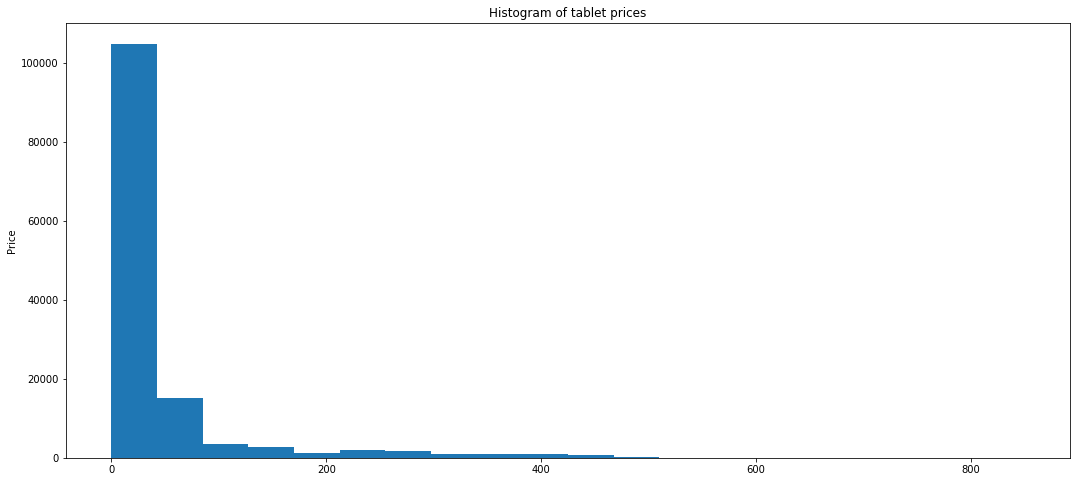

In [204]:
#Most of items are below $100, they could be accesories
df_all["price"].hist(bins=20,grid=False)
plt.title("Histogram of tablet prices")
plt.ylabel("Price")

In [205]:
# We can see that there are items which have a very low price and probably are accessories. So we have to get hid of
# them for our analysis, which will mainly focus on tablets and not it's accessories. 
# After checking the amazon website, it was noticed that the prices lower than $100 are include lots of accessories. 
# Therefore, this will be out cut line.

# Here we filter only the reviews for products costing more than $100 and reasign our variable df_tablet with these observations.

df_tab = df_all[df_all['price']>100]

df_tab.describe()

,overall,unixReviewTime,price
count,12611.000000,1.261100e+04,12611.000000
mean,4.103481,1.360861e+09,260.236671
std,1.250153,3.760017e+07,123.999280
min,1.000000,1.122941e+09,100.460000
25%,4.000000,1.340755e+09,154.950000
50%,5.000000,1.370909e+09,231.150000
75%,5.000000,1.388534e+09,312.360000
max,5.000000,1.406074e+09,850.000000


In [206]:
print("The shape of the dataset is {:,} rows and {} columns".format(df_tab.shape[0],df_tab.shape[1]))
print("The oldest post is from: {0:%d/%m/%y}".format(df_tab['timeFormat'].min()))
print("The newest post is from: {0:%d/%m/%y}".format(df_tab['timeFormat'].max()))
print("There are {:,} unique users ID who left a review.".format(df_tab['reviewerID'].nunique()))
print("There are {:,} unique users Names who left a review.".format(df_tab['reviewerName'].nunique()))
print("The average rating given by customers is {:.2f}".format(df_tab['overall'].mean()))

The shape of the dataset is 12,611 rows and 18 columns
The oldest post is from: 02/08/05
The newest post is from: 23/07/14
There are 10,959 unique users ID who left a review.
There are 10,074 unique users Names who left a review.
The average rating given by customers is 4.10


### 1.2.2) Data cleaning of tablet dataset <a class="anchor" id="part1.2.2"></a>

In [207]:
# We can see that there are 2738 non null values for brand (out of 4180 observations). 
df_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12611 entries, 237 to 1688828
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      12611 non-null  object        
 1   asin            12611 non-null  object        
 2   reviewerName    12568 non-null  object        
 3   helpful         12611 non-null  object        
 4   reviewText      12611 non-null  object        
 5   overall         12611 non-null  float64       
 6   summary         12611 non-null  object        
 7   unixReviewTime  12611 non-null  int64         
 8   reviewTime      12611 non-null  object        
 9   timeFormat      12611 non-null  datetime64[ns]
 10  imUrl           12611 non-null  object        
 11  description     12566 non-null  object        
 12  categories      12611 non-null  object        
 13  title           12611 non-null  object        
 14  price           12611 non-null  float64       
 15

In [208]:
# In order to solve this problem we will fill in the blank cells from the brand using the 
# first words from the title of the product, which we can see below:
df_tab[["title","brand"]].head()

,title,brand
237,"barnes &amp; noble nook tablet 16gb (color, bn...",NaN
238,"barnes &amp; noble nook tablet 16gb (color, bn...",NaN
239,"barnes &amp; noble nook tablet 16gb (color, bn...",NaN
240,"barnes &amp; noble nook tablet 16gb (color, bn...",NaN
241,"barnes &amp; noble nook tablet 16gb (color, bn...",NaN


In [209]:
def generate_brand(product_title):
    """Takes the title of the product in the title column and uses the
    first word in order to populate the null cells in the 'brand' column."""
    generated_brand = product_title.split()[0].capitalize()
    return generated_brand

# Now, we can use the pandas apply function to apply to generate values to the newly created  column.    
df_tab['brand'].fillna(value=df_tab['title'].apply(generate_brand), inplace=True)

df_tab.head()

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",2012-05-03,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",2012-05-08,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",2013-08-15,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",2012-02-15,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",2014-01-27,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes


In [210]:
'''Now we will drop duplicates based on specific columns: reviewerName, unixReviewTime, asin. 
And we will keep the last occurence.'''

df_tab.drop_duplicates(subset=['unixReviewTime', 'asin'], keep='last', inplace=True)

# Drop all observations that have null values in the columns "“reviewerName”,”price”,”description”,”related”"

df_tab.dropna(subset=['price', 'description', 'related'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [211]:
'''Amazon's ratings score scale range from 1 to 5, being:
1 = "I hate it" 
2 = "I don't like it"
3 = "It's okay"
4 = "I like it"
5 = "I love it!" 
Transform overall score above 3 as positive, and below 3 as negative
sentiment = 1: positive, sentiment = 0: negative '''

df_tab["sentiment"]=np.where(df_tab["overall"]>3,1,0)
df_tab.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand,sentiment
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",2012-05-03,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",2012-05-08,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,0
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",2013-08-15,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",2012-02-15,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",2014-01-27,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1


In [212]:
#Transform the list within "helpful" column in a ratio

lst_help=[]
for i in df_tab["helpful"]:
    #if there is no data in i[1], use nan value to avoid division by 0
    if i[1]==0:
        lst_help.append(np.nan)
    else:
        lst_help.append(i[0]/i[1])

#add the list in a new column         
df_tab["helpfulRatio"]=lst_help

df_tab.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,timeFormat,imUrl,description,categories,title,price,salesRank,related,brand,sentiment,helpfulRatio
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",2012-05-03,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1,0.75
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",2012-05-08,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,0,0.50
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",2013-08-15,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1,1.00
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",2012-02-15,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1,1.00
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",2014-01-27,http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1,0.00


In [213]:
#Create a month_year column
df_tab["month_year"]=df_tab["timeFormat"].dt.to_period("M")
#Create an hour column
df_tab["hour"]=df_tab["timeFormat"].dt.hour
#Create a day_week column
df_tab["day_week"]=df_tab["timeFormat"].dt.dayofweek
#Create a day_month column
df_tab["day_month"]=df_tab["timeFormat"].dt.day
df_tab.head()

#It will not be possible to make an analysis for hourly purchases, only with days

print("There are",df_tab["month_year"].nunique(),"unique month_year")
print("There are",df_tab["hour"].nunique(),"unique hours")
print("There are",df_tab["day_week"].nunique(),"unique days of the week")
print("There are",df_tab["day_month"].nunique(),"unique days of the month")

There are 100 unique month_year
There are 1 unique hours
There are 7 unique days of the week
There are 31 unique days of the month


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [214]:
#Drop all columns that will not be used on the analysis

df_tab=df_tab.drop(columns=["reviewerName","helpful","unixReviewTime","reviewTime","salesRank","imUrl"])
df_tab.head()

,reviewerID,asin,reviewText,overall,summary,timeFormat,description,categories,title,price,related,brand,sentiment,helpfulRatio,month_year,hour,day_week,day_month
237,A3LDPF5FMB782Z,1400501466,"The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,2012-05-03,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1,0.75,2012-05,0,3,3
238,A9HYSJ3D0D6I2,1400501466,"I saw this product on Amazon and thought ""what...",3.0,possible lemon,2012-05-08,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,0,0.50,2012-05,0,1,8
239,A3EOHF2YSVZA9L,1400501466,Now I have like four different kendels and I a...,5.0,Loved it,2013-08-15,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1,1.00,2013-08,0,3,15
240,ASH6NHZ1Z2O51,1400501466,"this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",2012-02-15,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1,1.00,2012-02,0,2,15
241,A3R2US71Y3CV9R,1400501466,"I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,2014-01-27,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,1,0.00,2014-01,0,0,27


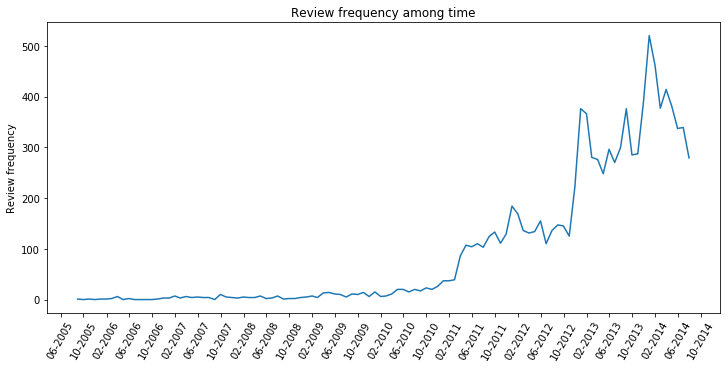

In [215]:
#Plot a timeseries of the frequency of reviews

#Group by timeFormat column
#Apply -> sentiment: mean and count; overall: mean
df_tab_time=df_tab.groupby("timeFormat").agg({"sentiment":["mean","count"], "overall":"mean"})
#Drop one level of column names
df_tab_time.columns = df_tab_time.columns.droplevel()

#Find min and max datetime
min_date=min(df_tab_time.index)
max_date=max(df_tab_time.index)

#Reindex the series and filling missing dates with np.nan
df_tab_time=df_tab_time.reindex(pd.date_range( min_date, max_date), fill_value=np.nan)

#Renaming the columns
df_tab_time.columns=["s_mean","s_count","o_mean"]

#Sampling the values into months
#Apply the same criteria for the functions
df_tab_time=df_tab_time.resample("M").agg({"s_mean":"mean","s_count":"sum","o_mean":"mean"})

#There are some months without reviews. In addition, it can be seen a peak of sales after 2010.
#Makes sense considering that Apple release the iPad in April 3, 2010
#Source: https://en.wikipedia.org/wiki/IPad_(1st_generation)#:~:text=The%20Wi%2DFi%20version%20of,was%20released%20on%20April%2030.

fig , ax = plt.subplots(figsize=(10,5))

#graph a barplot for the time series
ax.plot(df_tab_time.index.to_pydatetime(), df_tab_time["s_count"])
#define the xaxis as date
ax.xaxis_date()

#change the x axis format 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
#rotate the x ticks
plt.xticks(rotation=60)
plt.tight_layout()

plt.title("Review frequency among time")
plt.ylabel("Review frequency")

plt.show()

In [216]:
#Data starts to become relevant until April/2010 when Apple released the iPad. 
#We are going to filter the data form April/2010 to make our analysis

df_tab=df_tab[df_tab["timeFormat"]>'2010-04-01']

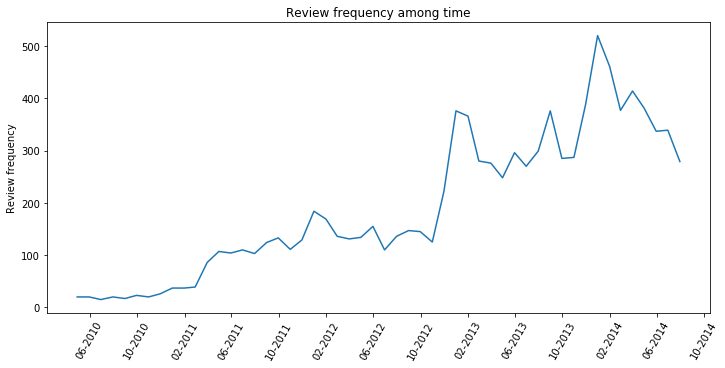

In [217]:
#Plot a timeseries of the frequency of reviews

#Group by timeFormat column
#Apply -> sentiment: mean and count; overall: mean
df_tab_time=df_tab.groupby("timeFormat").agg({"sentiment":["mean","count"], "overall":"mean"})
#Drop one level of column names
df_tab_time.columns = df_tab_time.columns.droplevel()

#find min and max datetime
min_date=min(df_tab_time.index)
max_date=max(df_tab_time.index)

#reindex the series and filling missing dates with np.nan
df_tab_time=df_tab_time.reindex(pd.date_range( min_date, max_date), fill_value=np.nan)

#renaming the columns
df_tab_time.columns=["s_mean","s_count","o_mean"]

#Sampling the values into months
#Apply the same criteria for the functions
df_tab_time=df_tab_time.resample("M").agg({"s_mean":"mean","s_count":"sum","o_mean":"mean"})

fig , ax = plt.subplots(figsize=(10,5))

#graph a barplot for the time series
ax.plot(df_tab_time.index.to_pydatetime(), df_tab_time["s_count"])
#define the xaxis as date
ax.xaxis_date()

#change the x axis format 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
#rotate the x ticks
plt.xticks(rotation=60)
plt.tight_layout()

plt.title("Review frequency among time")
plt.ylabel("Review frequency")

plt.show()

In [218]:
df_tab_time.head()

,s_mean,s_count,o_mean
2010-04-30,0.729167,20.0,4.041667
2010-05-31,0.631579,20.0,3.526316
2010-06-30,0.642857,15.0,3.857143
2010-07-31,0.690476,20.0,4.190476
2010-08-31,0.800000,17.0,4.100000


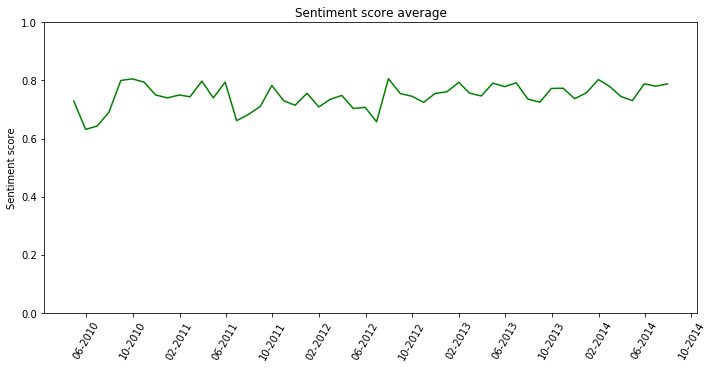

In [219]:
fig , ax = plt.subplots(figsize=(10,5))


#graph a barplot for the time series
ax.plot(df_tab_time.index.to_pydatetime(), df_tab_time["s_mean"], color="green")
#define the xaxis as date
ax.xaxis_date()

#change the x axis format 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

#rotate the x ticks
plt.xticks(rotation=60)
plt.tight_layout()

plt.title("Sentiment score average")
plt.ylabel("Sentiment score")
plt.ylim(0,1)

plt.show()

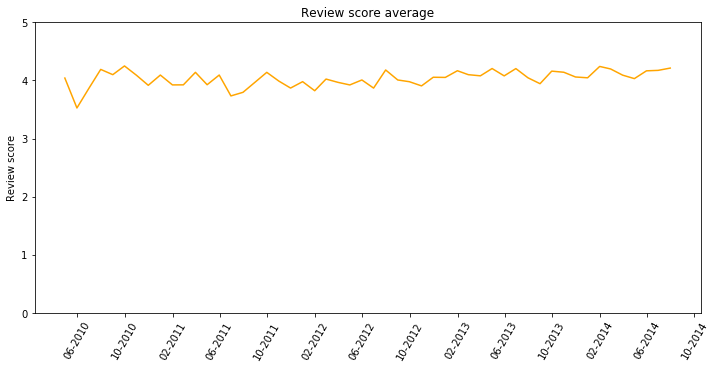

In [220]:
fig , ax = plt.subplots(figsize=(10,5))

#graph a barplot for the time series
ax.plot(df_tab_time.index.to_pydatetime(), df_tab_time["o_mean"], color="orange")
#define the xaxis as date
ax.xaxis_date()

#change the x axis format 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

#rotate the x ticks
plt.xticks(rotation=60)
plt.tight_layout()

plt.title("Review score average")
plt.ylabel("Review score")
plt.ylim(0,5)

plt.show()

### 1.2.3) Descriptive statistics of Tablet dataset <a class="anchor" id="part1.2.3"></a>

In [221]:
# Descriptive statistics

# Now that we finished cleaning our dataset, let's have a look at it.

print("================ Descriptive Statistics ================")
print()
print("The shape of the dataset is {:,} rows and {} columns.".format(df_tab.shape[0],df_tab.shape[1]))
print("The oldest post is from: {:%d/%m/%y}".format(df_tab['timeFormat'].min()))
print("The newest post is from: {:%d/%m/%y}".format( df_tab['timeFormat'].max()))
print("There are {:,} unique users ID who left a review.".format(df_tab['reviewerID'].nunique()))
print("There are {:,} unique products.".format(df_tab['title'].nunique()))
print("There are {:,} unique brands.".format(df_tab['brand'].nunique()))
print("There are {:,} good reviews.".format((df_tab['sentiment']==1).sum()))
print("There are {:,} bad reviews.".format((df_tab['sentiment']==0).sum()))
print("The average rating given by customers is {:.2f}.".format(df_tab['overall'].mean()))

================ Descriptive Statistics ================

The shape of the dataset is 9,930 rows and 18 columns.
The oldest post is from: 04/04/10
The newest post is from: 23/07/14
There are 8,825 unique users ID who left a review.
There are 312 unique products.
There are 125 unique brands.
There are 7,516 good reviews.
There are 2,414 bad reviews.
The average rating given by customers is 4.07.


## 1.3) Hypothesis <a class="anchor" id="part1.3"></a>

In [222]:
# Hypothesis

# Assess their popularity with the customers - which product is more popular

# How have large events in society affected the number of reviews or the reviews' sentiment? - large events in society affects the purchasing behaviour of customers and its review. large event = define us events - us elections - economic crisis - wars - apple (companies) releases - katrina

# cyclical eventss (holidays, seasons, etc) modified purchasing behaviour

# there is a correlation between specific times of the day and purchasing behaviour

# Predicting ratings based on reviews

# Usefulness on large volume of reviews

# Rating vs number of reviews

# Rating vs proportion of reviews

# Helpful proportion vs Number of reviews

# Rating vs helpfulness ratio

# Top 20 most reviewed products

# Bottom 20 reviewed products

# Positive and negative words

# World cloud for different ratings, brand name etc

# Part 2: Advanced Analysis <a class="anchor" id="part2"></a>

## 2.1) Exploratory Analysis <a class="anchor" id="part2.1"></a>

### 2.1.1) Brand Analysis <a class="anchor" id="part2.1.1"></a>

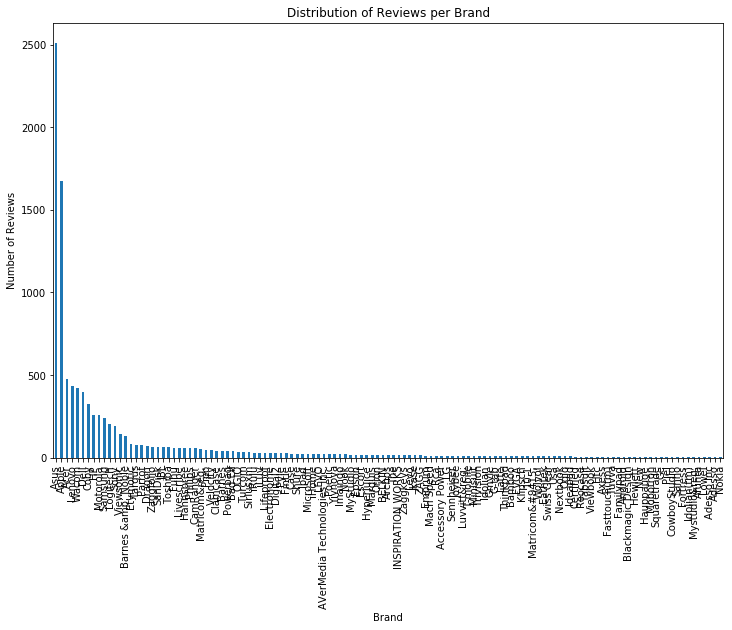

In [223]:
# We will look at the number of reviews received by each brand.

# Modify plot

plt.figure(figsize=(12,8))
df_tab['brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Reviews per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')
plt.show()


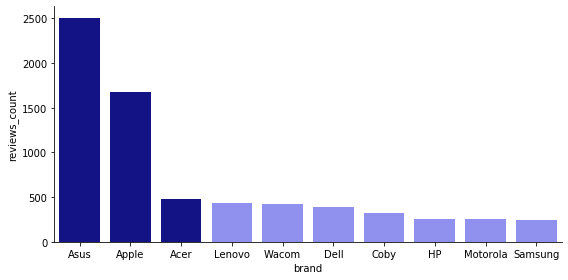

In [224]:
'''Apple and Asus are way ahead of their concurrents in terms of reviews.'''

#Change plot colour

#We filter the top 10 brands with the highest number of reviews.
top_10_brands = pd.DataFrame(df_tab['brand'].value_counts()[:10])
top_10_brands.reset_index(inplace=True)
top_10_brands.columns= ['brand', 'reviews_count']
top_10_brands

col_list=["#000099"]*3 + ["#8080ff"]*7

# We plot the top 10 brands, by number of reviews received.
g = sns.catplot(x="brand", y="reviews_count",
                data=top_10_brands, kind="bar",
                height=4, aspect=2, palette=sns.color_palette(col_list,10));

plt.show()



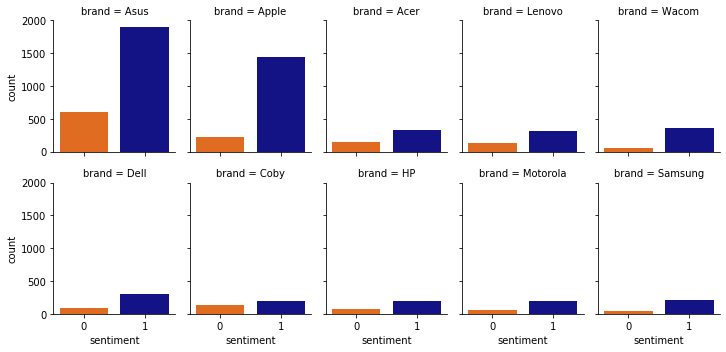

In [225]:
'''Analysis: All top 10 brands have more positive than negative reviews. However, Apple and Asus show a significant
number of positive reviews compared to negative. In fact, from the plot, we can see that the more reviews you have,
more likely you are of having positive reviews, and therefore, being at the top.
Source: https://www.geeksforgeeks.org/python-seaborn-catplot/'''

col_list=["#ff6600"] + ["#000099"]


# We look at the number of positive and negative reviews for the top 10 most reviewed brands.
list_10 = top_10_brands['brand'].unique()
subset_df_top_10_brands = df_tab[df_tab['brand'].isin(list_10)]

g = sns.catplot(x="sentiment", col="brand", col_wrap=5,
                data=subset_df_top_10_brands,
                kind="count", height=2.5, aspect=.8, col_order=list_10,
                palette=sns.color_palette(col_list,2))



C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


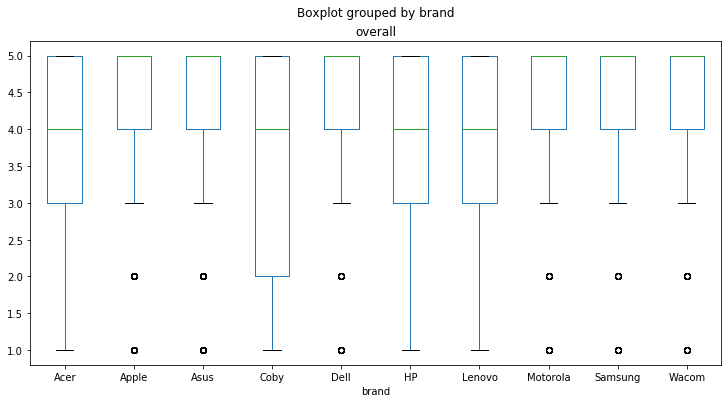

In [226]:
'''Analysis: The distribution of ratings is similar between Apple, Motorola, Samsung and Sony.
Question: Can we consider that these brands are similar? '''

# Boxplot representing the ratings by brands.
# Source: https://github.com/Spugnam/amazon_reviews_scrapy/blob/master/amazon2/Amazon_Visualization_Final.ipynb

# Using rating so each data point is a product

subset_df_top_10_brands.boxplot(by='brand', column='overall', figsize=(12,6),grid=False) 

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


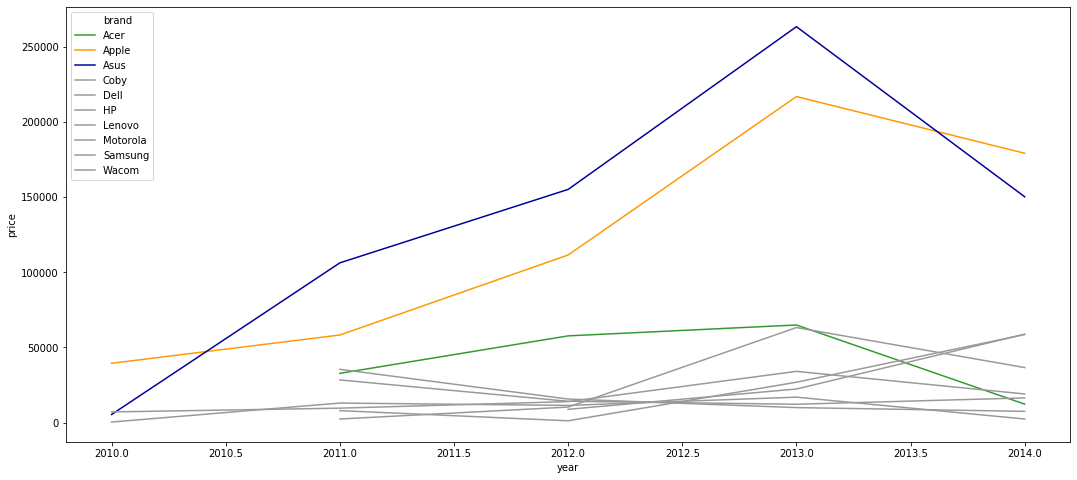

In [227]:
'''Analysis: We can see a number of interesting facts in this plot. First, Asus was at the top of tablets sales until
2012. Then, Apple took the lead, and Asus experienced a steady decrease. However, Asus kept the second position during 
the whole period. Some other companies such as Lenovo, Sony and Acer, were increasing sales, until 2013. After that, all 
companies saw their demand dwingle, except for Samsung. Samsung was the only brand that kept an upward trend during 
the whole period. '''

# Creating a column to store the year of the review
subset_df_top_10_brands['year'] = pd.DatetimeIndex(subset_df_top_10_brands['timeFormat']).year
# creating a new subset with brand, year and total sales (sales = sum of prices of each product, by brand)
sales_per_year_by_brand = subset_df_top_10_brands.groupby(['brand', 'year'])['price'].sum()
#pd.DataFrame(sales_per_year_by_brand)

col_list=["#339933"] + ["#ff9900"] + ["#000099"] + ["#999999"]*7
sales_per_year_by_brand = sales_per_year_by_brand.reset_index()
sns.lineplot(x='year', y='price', hue='brand', 
             data=sales_per_year_by_brand ,palette=sns.color_palette(col_list,10))

plt.show()

### 2.1.2) Product Analysis <a class="anchor" id="part2.1.2"></a>

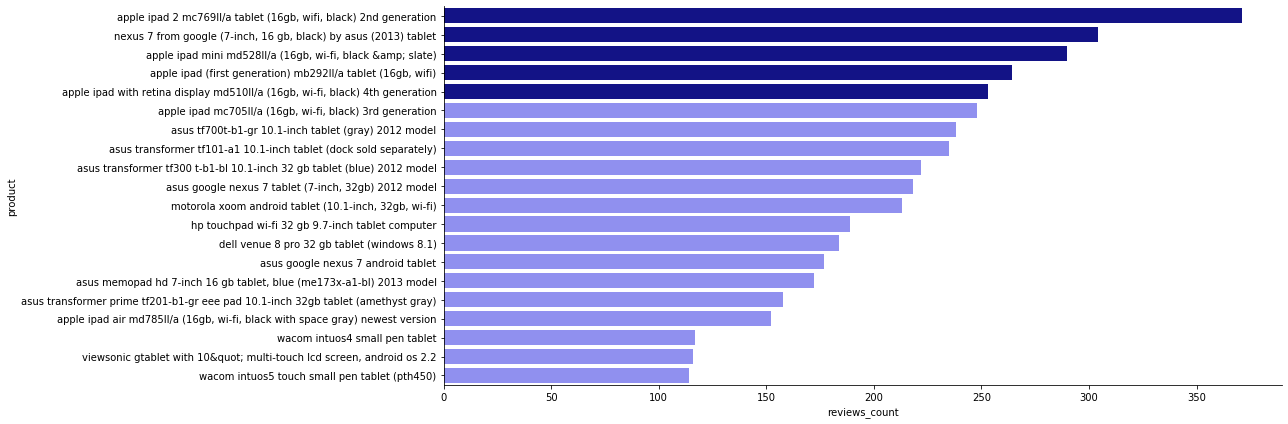

In [228]:
'''Analysis: We can see that Apple ipads dominate the market and are on the top of reviews, competing with Asus 
tablets. We could use the product descrition to find the features that the top 20 most reviewed tablets have.''' 

# Now let's look at the top most reviewed tablets.
top_20_products = pd.DataFrame(df_tab['title'].value_counts()[:20])
top_20_products.reset_index(inplace=True)
top_20_products.columns= ['product', 'reviews_count']
top_20_products

col_list=["#000099"]*5 + ["#8080ff"]*15

g2 = sns.catplot(x="reviews_count", y="product",
                data=top_20_products, kind="bar",
                height=6, aspect=3,palette=sns.color_palette(col_list,20))

plt.show()

### 2.1.3) Feature Correlation Analysis <a class="anchor" id="part2.1.3"></a>

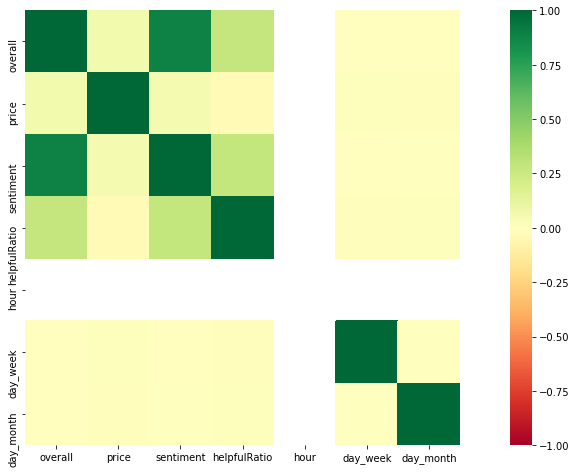

In [229]:
'''From the heatmap we can see that:
1. price and the overall rating are inversely proportional.
2. sentiment and price are inversely proportional.
3. helpfulRatio and price are inversely proportional.
4. sentiment and the overall rating is directly proportional.

PROPOSAL:
1. Sentiment and overall have a strong correlation. Sentiment is dependent of the overall column. 
2. There is a small correlation between overall and helpfulRatio. 
3. There are no correlation between the other columns
4. hour column show no correlation with other columns because only has an unique value. 

'''

ax = sns.heatmap(df_tab.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.show()

0.004192042332727297


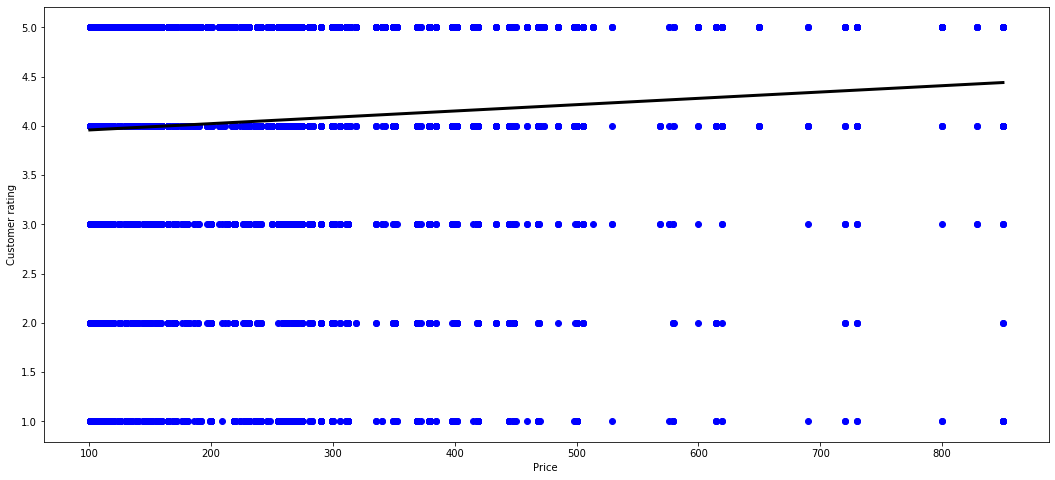

'Analysis: As we can see from the plot, there is a slight decrease in the rating given by a customer when the price paid for\na product is high. This means that customers get more demanding and more critical when they pay more \nfor a product.'

In [230]:
''' GABY: MAYBE THIS PART CAN BE TAKEN OUT. PRICE DOESN'T HAVE CORRELATION WITH SCORE
'''

# Based on the previous heatmap, we decided to investigate the correlation between the overall rating and Price 
# using Linear Regression.

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_price = df_tab['price'].values.reshape(-1,1) 
y_overall = df_tab['overall'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_price), max(x_price)).reshape(-1,1)
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_price, y_overall, test_size=0.3, random_state=42)

# Create the regression model: reg_all
reg = LinearRegression()

# Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

# Print accuracy
print(reg.score(x_price, y_overall))

# Plot regression line
plt.scatter(x_price, y_overall, color='blue')
plt.plot(prediction_space, y_predict, color='black', linewidth=3)
plt.ylabel('Customer rating')
plt.xlabel('Price ')
plt.show()

'''Analysis: As we can see from the plot, there is a slight decrease in the rating given by a customer when the price paid for
a product is high. This means that customers get more demanding and more critical when they pay more 
for a product.'''

## 2.2) Sentiment Analysis <a class="anchor" id="part2.2"></a>

### 2.2.1) Sentiment analysis across time <a class="anchor" id="part2.2.1"></a>

Text(0.5, 0, '')

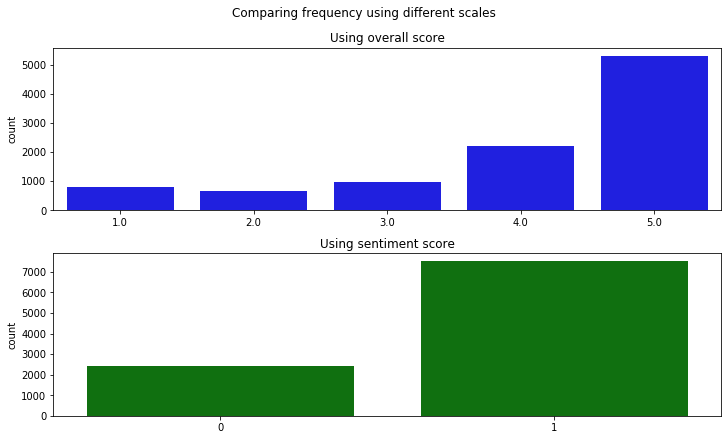

In [231]:
#import seaborn and matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing frequency using different scales")

#First ax title
ax[0].set_title("Using overall score")
#plot frequency count of overall score
sns.countplot(ax=ax[0],x="overall",data=df_tab,color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("Using sentiment score")
#ax[1].set_xtitle("")
#plot frequency count of response score
sns.countplot(ax=ax[1],x="sentiment",data=df_tab,color="g")
ax[1].set_xlabel("")

In [232]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.corpus import movie_reviews
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [233]:
from __future__ import print_function, division
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords
import math
from collections import Counter
nltk.download('stopwords')
import pprint 
pp = pprint.PrettyPrinter(indent=4)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [234]:
#Split the df by sentiment
#We are only going to use the reviewText and sentiment columns
pos_corpus=df_tab[df_tab["sentiment"]==1][["reviewText","sentiment"]]
neg_corpus=df_tab[df_tab["sentiment"]==0][["reviewText","sentiment"]]

pos_corpus.head(4)

,reviewText,sentiment
237,"The Nook Tablet, in both the 16gb version and ...",1
239,Now I have like four different kendels and I a...,1
240,"this is excellent tablet, excellent touch scre...",1
241,"I love nooks. Kindle fire is OK, but nooks are...",1


In [235]:
#Function to normalise each word
def normalise(document):
    #Remove punctuation
    text = "".join([ch for ch in document if ch not in string.punctuation])
    #Tokenise text
    tokens = nltk.word_tokenize(text)
    #Apply Porter steamming
    stemmer = PorterStemmer()
    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    return ret

#Create a list of words for each review 
pos_docs=[x.strip() for x in pos_corpus["reviewText"] ]
#Normalise each word of the reviews and include the value 1 (positive)
pos_words=[(normalise(d).split(), "pos") for d in pos_docs]

#same case with negative reviews
neg_docs=[x.strip() for x in neg_corpus["reviewText"] ]
neg_words=[(normalise(d).split(), "neg") for d in neg_docs]

pos_words[0]

(['the',
  'nook',
  'tablet',
  'in',
  'both',
  'the',
  '16gb',
  'version',
  'and',
  '8',
  'gb',
  'version',
  'are',
  'the',
  'best',
  'color',
  'eread',
  'of',
  '2012',
  'both',
  'are',
  'bargain',
  'when',
  'purchas',
  'at',
  'the',
  'discount',
  'price',
  'barn',
  'nobl',
  'provid',
  'to',
  'it',
  'membershowev',
  'they',
  'are',
  'design',
  'for',
  'readingif',
  'you',
  'want',
  'a',
  'game',
  'tablet',
  'a',
  'skype',
  'video',
  'tablet',
  'or',
  'need',
  'access',
  'to',
  'thousand',
  'of',
  'app',
  'you',
  'need',
  'an',
  'ipadi',
  'have',
  'own',
  'a',
  'brand',
  'x',
  'color',
  'eread',
  'for',
  'about',
  'a',
  'year',
  'but',
  'seldom',
  'use',
  'it',
  'for',
  'read',
  'becaus',
  'it',
  'caus',
  'eye',
  'strain',
  'i',
  'have',
  'a',
  'nook',
  'simpl',
  'touch',
  'eread',
  'that',
  'is',
  'wonder',
  'for',
  'book',
  'but',
  'it',
  'eink',
  'screen',
  'is',
  'black',
  'on',
  'whit

In [236]:
#The length of positive and negative reviews 
len(pos_words), len(neg_words)

(7516, 2414)

In [237]:
train_pos_docs, test_pos_docs = train_test_split(pos_words, test_size=0.2)
train_neg_docs, test_neg_docs = train_test_split(neg_words, test_size=0.2)

training_docs = train_pos_docs + train_neg_docs
testing_docs = test_pos_docs + test_neg_docs

sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

all_words_neg[:5]

['i', 'like', 'the', 'idea', 'of']

In [238]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
print(len(unigram_feats))
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

8913


In [239]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)
print(training_set[0])

({'contains(the_NEG)': False, 'contains(to_NEG)': False, 'contains(and_NEG)': False, 'contains(it_NEG)': False, 'contains(a_NEG)': False, 'contains(i_NEG)': False, 'contains(is_NEG)': False, 'contains(the)': True, 'contains(of_NEG)': False, 'contains(for_NEG)': False, 'contains(that_NEG)': False, 'contains(i)': True, 'contains(thi_NEG)': False, 'contains(with_NEG)': False, 'contains(you_NEG)': False, 'contains(on_NEG)': False, 'contains(and)': True, 'contains(in_NEG)': False, 'contains(it)': True, 'contains(have_NEG)': False, 'contains(a)': True, 'contains(but_NEG)': False, 'contains(my_NEG)': False, 'contains(tablet_NEG)': False, 'contains(not_NEG)': False, 'contains(to)': True, 'contains(use_NEG)': False, 'contains(is)': True, 'contains(as_NEG)': False, 'contains(be_NEG)': False, 'contains(thi)': True, 'contains(or_NEG)': False, 'contains(for)': True, 'contains(so_NEG)': False, 'contains(are_NEG)': False, 'contains(wa_NEG)': False, 'contains(can_NEG)': False, 'contains(if_NEG)': Fals

In [240]:
#The precision for negative sentiment is 0.48. Meanwhile, the precision for postivie sentiment is 0.84. 
#The overall accuracy is 0.74. This model can be improved if the amount of positive and negative data are similar. 

naive_bayes = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(naive_bayes, training_set)
sentim_analyzer.evaluate(test_set)

Training classifier
Evaluating NaiveBayesClassifier results...


{'Accuracy': 0.7262204328132864,
 'Precision [neg]': 0.44504504504504505,
 'Recall [neg]': 0.5113871635610766,
 'F-measure [neg]': 0.4759152215799615,
 'Precision [pos]': 0.835195530726257,
 'Recall [pos]': 0.7952127659574468,
 'F-measure [pos]': 0.8147138964577656}

### 2.2.2) TD-IDF Analysis for all dataset <a class="anchor" id="part2.2.2"></a>

In [241]:
#libraries for text analytics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#Each item on the list is a review
review_words= [x.strip() for x in df_tab["reviewText"]]
review_words[0]

'The Nook Tablet, in both the 16gb version and 8 gb version, are the best color e-readers of 2012.  Both are bargains when purchased at the discounted price Barnes & Noble provides to its members.However, they are designed for reading...if you want a gaming tablet, a Skype video tablet, or need access to thousands of apps, you need an I-Pad.I have owned a "Brand X" color e-reader for about a year, but seldom use it for reading because it causes eye strain. I have a Nook Simple Touch e-reader that is wonderful for books, but its e-ink screen is black on white only, which does not work well for colorful magazines such as "Automobile" or "National Geographic".Barnes & Noble has an offer that enables its members to buy the Nook tablet for MUCH less than the price quoted by internet vendors, so I took advantage of their offer...plus the staff of my neighborhood Barnes & Noble were very helpful, and invited me to classes they provide to teach new owners the in\'s and out\'s of their new tabl

In [242]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an = tfidf.fit(review_words)
#transform to document-term matrix
corpus_tf_idf = tfidf_an.transform(review_words) 

sum_words_idf = corpus_tf_idf.sum(axis=0)
words_freq_idf = [(word, sum_words_idf[0, idx]) for word, idx in tfidf_an.vocabulary_.items()]

tfidf_df=pd.DataFrame(words_freq_idf,columns=["Word","Count"])
tfidf_df=tfidf_df.sort_values(by="Count",ascending=False)

tfidf_df.head(10)

,Word,Count
1,tablet,524.851754
529,ipad,378.438059
33,use,286.979044
177,great,285.704185
42,screen,256.355679
153,good,244.831657
267,like,240.255585
236,just,227.622320
195,android,192.662501
440,device,187.208301


In [243]:
#intialise countvectoriser; stop words in English
cv = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an=cv.fit_transform(review_words)

#get the word names
sum_words_tf=cv.get_feature_names()
#term frequency of each word
count_words_tf=tf_an.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df=pd.DataFrame(list(zip(sum_words_tf,count_words_tf)),columns=["Word","Count"])
tf_df=tf_df.sort_values(by="Count",ascending=False)

tf_df.head(10)

,Word,Count
27019,tablet,17280
15217,ipad,9999
29387,use,8505
24080,screen,7692
16506,like,7240
15716,just,6754
12997,great,5958
12767,good,5825
8820,device,5132
3233,android,4905


Text(0.5, 0, '')

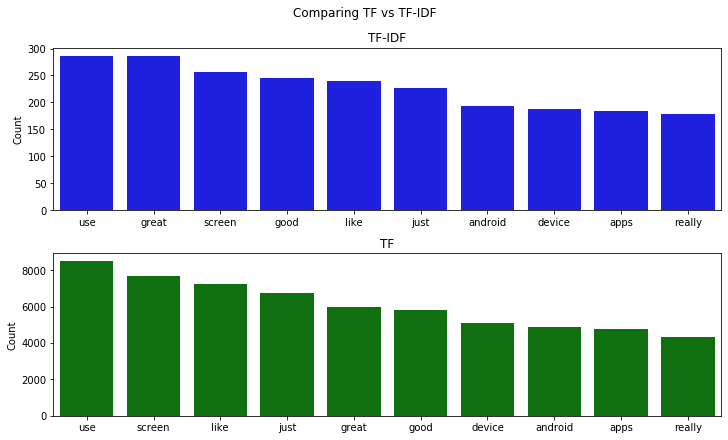

In [244]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing TF vs TF-IDF")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df.head(12).tail(10),color="g")
ax[1].set_xlabel("")



### 2.2.3) TF-IDF analysis for positive sentiment <a class="anchor" id="part2.2.3"></a>

In [245]:
#Each item on the list is a review

df_pos=df_tab[df_tab["sentiment"]==1]

review_words_pos= [x.strip() for x in df_pos["reviewText"]]
review_words_pos[:5]

['The Nook Tablet, in both the 16gb version and 8 gb version, are the best color e-readers of 2012.  Both are bargains when purchased at the discounted price Barnes & Noble provides to its members.However, they are designed for reading...if you want a gaming tablet, a Skype video tablet, or need access to thousands of apps, you need an I-Pad.I have owned a "Brand X" color e-reader for about a year, but seldom use it for reading because it causes eye strain. I have a Nook Simple Touch e-reader that is wonderful for books, but its e-ink screen is black on white only, which does not work well for colorful magazines such as "Automobile" or "National Geographic".Barnes & Noble has an offer that enables its members to buy the Nook tablet for MUCH less than the price quoted by internet vendors, so I took advantage of their offer...plus the staff of my neighborhood Barnes & Noble were very helpful, and invited me to classes they provide to teach new owners the in\'s and out\'s of their new tab

In [246]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf_pos = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

# >>> vectorizer = TfidfVectorizer()
# >>> X = vectorizer.fit_transform(corpus)
# >>> print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

#fit the tfidf algorithm with review_words 
tfidf_an_pos = tfidf_pos.fit(review_words_pos)
#transform to document-term matrix
corpus_tf_idf_pos = tfidf_an_pos.transform(review_words_pos) 

sum_words_idf_pos = corpus_tf_idf_pos.sum(axis=0)
words_freq_idf_pos = [(word, sum_words_idf_pos[0, idx]) for word, idx in tfidf_an_pos.vocabulary_.items()]

tfidf_df_pos=pd.DataFrame(words_freq_idf_pos,columns=["Word","Count"])
tfidf_df_pos=tfidf_df_pos.sort_values(by="Count",ascending=False)

tfidf_df_pos.head(10)

,Word,Count
1,tablet,405.720519
423,ipad,304.564758
177,great,241.610619
33,use,229.812731
153,good,194.225573
42,screen,191.216034
250,like,186.452018
236,just,170.039368
273,love,157.211195
195,android,148.256636


In [247]:
#intialise countvectoriser; stop words in English
cv_pos = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an_pos=cv_pos.fit_transform(review_words_pos)

#get the word names
sum_words_tf_pos=cv_pos.get_feature_names()
#term frequency of each word
count_words_tf_pos=tf_an_pos.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df_pos=pd.DataFrame(list(zip(sum_words_tf_pos,count_words_tf_pos)),columns=["Word","Count"])
tf_df_pos=tf_df_pos.sort_values(by="Count",ascending=False)

tf_df_pos.head(10)

,Word,Count
23043,tablet,12953
12929,ipad,7921
25032,use,6679
20529,screen,5626
14037,like,5488
11031,great,5042
13350,just,4859
10830,good,4436
2652,android,3760
7473,device,3664


Text(0.5, 0, '')

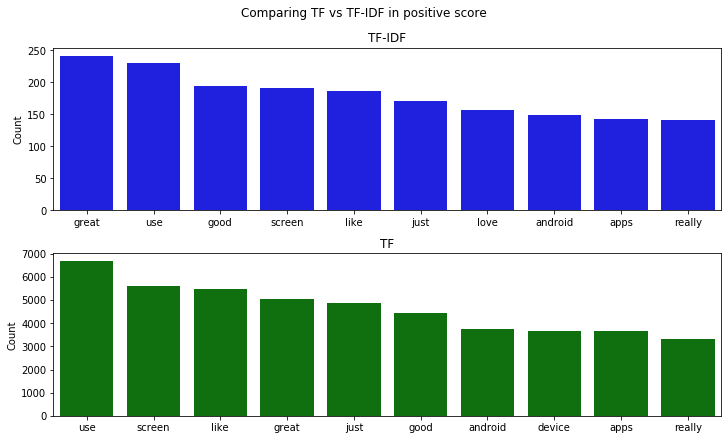

In [248]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing TF vs TF-IDF in positive score")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df_pos.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df_pos.head(12).tail(10),color="g")
ax[1].set_xlabel("")



### 2.2.4) TF-IDF analysis for negative sentiment  <a class="anchor" id="part2.2.4"></a>

In [249]:
#Each item on the list is a review

df_neg=df_tab[df_tab["sentiment"]==0]

review_words_neg= [x.strip() for x in df_neg["reviewText"]]
review_words_neg[:5]

['I saw this product on Amazon and thought "what a great deal" because this is a 16GB version of the same tablet that Barnes & Noble is selling for $250 dollars.It mostly works, and the screen is great for reading books.  I have had problems with the browser since 2 weeks of owning and the Apps have issues loading and playing some games.  If I could, I would return this product and just pay out the money for a brand new one.',
 "Have no idea why people love this thing so much, you can't load any applications unless they are from the Barnes & Noble store and you can't even download the free version of Angry Birds.Apparently Barnes & Noble is worse than Apple at remotely disabling Nooks they deemed rooted by end users. You have less control of this thing than you would your TV.The root kits are useless for this OS version 1.4.2 and the instructions to root / jailbreak it read worse than rocket instructions from annoying geeks !It is an overpriced Barnes & Noble franchise in your dumb lit

In [250]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf_neg = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an_neg = tfidf_neg.fit(review_words_neg)
#transform to document-term matrix
corpus_tf_idf_neg = tfidf_an_neg.transform(review_words_neg) 

sum_words_idf_neg = corpus_tf_idf_neg.sum(axis=0)
words_freq_idf_neg = [(word, sum_words_idf_neg[0, idx]) for word, idx in tfidf_an_neg.vocabulary_.items()]

tfidf_df_neg=pd.DataFrame(words_freq_idf_neg,columns=["Word","Count"])
tfidf_df_neg=tfidf_df_neg.sort_values(by="Count",ascending=False)

tfidf_df_neg.head(10)

,Word,Count
8,tablet,125.333383
439,ipad,75.021553
15,screen,68.221035
28,just,60.175570
89,use,59.429724
210,like,56.341609
91,good,53.245733
78,device,52.204298
921,asus,51.153918
367,work,46.807642


In [251]:
#intialise countvectoriser; stop words in English
cv_neg = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an_neg=cv_neg.fit_transform(review_words_neg)

#get the word names
sum_words_tf_neg=cv_neg.get_feature_names()
#term frequency of each word
count_words_tf_neg=tf_an_neg.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df_neg=pd.DataFrame(list(zip(sum_words_tf_neg,count_words_tf_neg)),columns=["Word","Count"])
tf_df_neg=tf_df_neg.sort_values(by="Count",ascending=False)

tf_df_neg.head(10)

,Word,Count
13720,tablet,4327
7632,ipad,2078
12143,screen,2066
7854,just,1895
14890,use,1826
8264,like,1752
4230,device,1468
6359,good,1389
14120,time,1254
15541,work,1159


Text(0.5, 0, '')

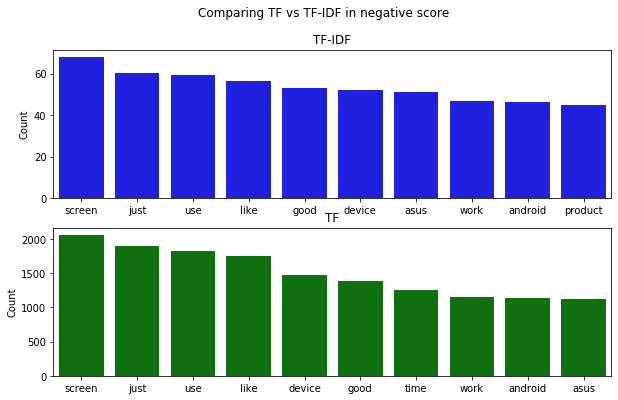

In [252]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6))

#Main title
fig.suptitle("Comparing TF vs TF-IDF in negative score")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df_neg.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df_neg.head(12).tail(10),color="g")
ax[1].set_xlabel("")

## 2.3) Time Series Analysis  <a class="anchor" id="part2.3"></a>

### 2.3.1) Cyclical Events  <a class="anchor" id="part2.3.1"></a>

In [253]:
#Source: https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
df_tab['timeFormat'].min(), df_tab['timeFormat'].max()

(Timestamp('2010-04-04 00:00:00'), Timestamp('2014-07-23 00:00:00'))

In [254]:
df_tab_ordered = df_tab.sort_values('timeFormat')
df_tab_ordered.isnull().sum()

reviewerID         0
asin               0
reviewText         0
overall            0
summary            0
timeFormat         0
description        0
categories         0
title              0
price              0
related            0
brand              0
sentiment          0
helpfulRatio    3018
month_year         0
hour               0
day_week           0
day_month          0
dtype: int64

In [255]:
df_tab_ordered = df_tab_ordered.groupby('timeFormat')['price'].sum().reset_index()
df_tab_ordered = df_tab_ordered.set_index('timeFormat')
df_tab_ordered.index

DatetimeIndex(['2010-04-04', '2010-04-05', '2010-04-08', '2010-04-10',
               '2010-04-11', '2010-04-14', '2010-04-15', '2010-04-16',
               '2010-04-18', '2010-04-21',
               ...
               '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17',
               '2014-07-18', '2014-07-19', '2014-07-20', '2014-07-21',
               '2014-07-22', '2014-07-23'],
              dtype='datetime64[ns]', name='timeFormat', length=1439, freq=None)

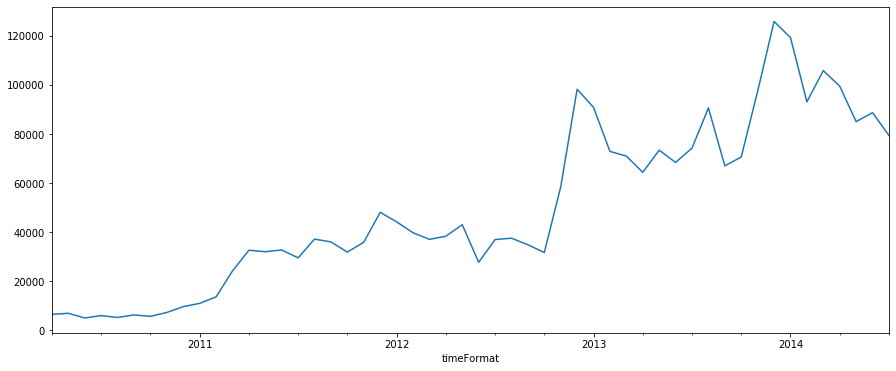

In [256]:
# We assume that the sum of the prices of products that were reviewed in a certain month represent the
# total sales in that month. 
y = df_tab_ordered['price'].resample('MS').sum()

# in the resample function we used the argument 'MS' for the parameter 'role'. 
# in the resample function, 'MS' refers to month start frequency, which was the timestamp used for this analysis.

y.plot(figsize=(15, 6))
plt.show()

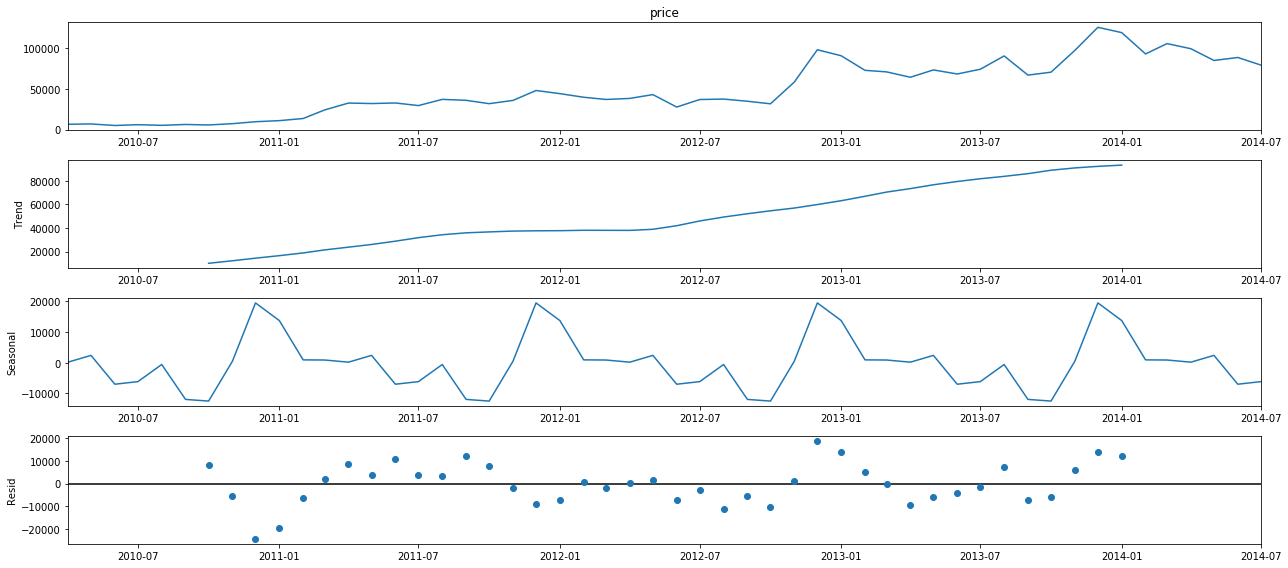

In [257]:
'''The plot shows that the tablet sales have an overall upward trend. It also suggests a seasonality pattern, mostly 
associated with the months that Apple has new releases. This pattern started after Apple launched its first iPad in 
April 2010. As we can see from the plot, there is the first peak in tablet sales during this time. An even more 
significant peak happens in March 2011, when Apple launches iPad 2. In the following year, tablet sales are unstable 
and experiences a slight decrease in purchases. However, in November 2013 we see a new significant 
peak, most likely associated with Apple releasing 2 new iPads (iPad Air and iPad Mini 2). 

From this plot we can infer that Apple releases play a tremendous impact in the overall sales of tablets.'''

from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8

# Because the function seasonal_decompose() does not handle missing values, we will take data starting from 2009.
decomposition = sm.tsa.seasonal_decompose(y['2009':], model='additive')
fig = decomposition.plot()
plt.show()

In [258]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [259]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1269.7427497274712
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:974.5522496555888
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:915.8706995741092


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:972.3165949521206
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:910.7191944799903
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:889.0650966577352
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:646.3416634915278
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:612.3800539502832
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1210.8512671965655
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:919.0663118532415
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:867.2559535053028
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1080.6283627139617
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:962.6827340262104
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:916.7789838357028
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:641.418993035257
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:595.8599482463856
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1084.0599801085127
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:827.7925691429032
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:817.8870438758072


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1136.8861447594913
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:839.3084105649599
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:820.3907354235243
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:589.676365827834
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:572.0216204041188
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1063.8824978974515
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:801.6193662628608
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:798.374326821523


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1086.2135038115164
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:841.9802998439924
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:802.1341003764584
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:590.7791445571999
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:549.8149513641669
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1106.6417604974522
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:842.2266746426925
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:838.445430349984


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1136.753055565829
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:841.0801750687662
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:842.6735010544387
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:591.4345732480516
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:593.4320735221687
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1086.2820564375118
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:823.8152007068745
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:819.5235928564359


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1186.6988398294973
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:843.0342825790586
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:824.0402376815777
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:592.1370993314727
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:573.5450106203732
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1085.5722898803328
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:821.9582960565687
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:818.8411709787753
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1146.98938077847
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:820.9357545533483
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:822.4227820835065
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:570.5474682691623
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:572.5225308636831
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1059.3823007587803
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:803.5903374141932
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:800.3571926295783


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1092.3758935357885
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:821.6122167967249
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:802.8185579312789
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:572.1492374718632
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:548.5941890677274


In [260]:
# From the output we can see that the SARIMAX (1, 1, 1)x(1, 1, 1, 12) gives us the most optimal option with the
# AIC value of 1686.55. Therefore, we will use it.

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6660      0.219      3.042      0.002       0.237       1.095
ma.L1         -0.9999      0.316     -3.163      0.002      -1.619      -0.380
ar.S.L12       0.4081      0.695      0.587      0.557      -0.954       1.770
ma.S.L12      -0.4912      0.792     -0.620      0.535      -2.043       1.060
sigma2      1.283e+08    2.8e-09   4.59e+16      0.000    1.28e+08    1.28e+08


In [262]:
''' GABY PLEASE CHECK THIS CODE. IT IS NOT RUNNING'''

# Now we will use the diagnostics method to explore possible uncommon behaviour.
#results.plot_diagnostics(figsize=(16, 8))
#plt.show()

' GABY PLEASE CHECK THIS CODE. IT IS NOT RUNNING'

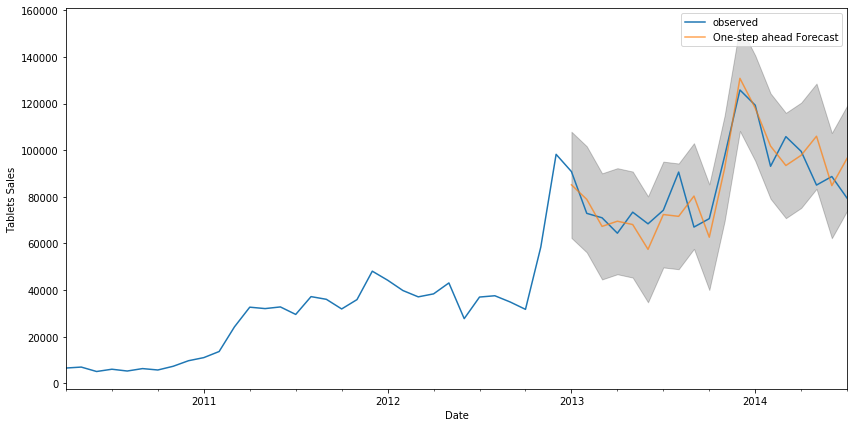

In [263]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2009':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Tablets Sales')
plt.legend()
plt.show()

In [264]:
# create a copy of the dataframe, and add columns for month and year
df_tablets = df_tab[['timeFormat', 'price']].set_index('timeFormat')
df_tablets['month'] = [i.month for i in df_tablets.index]
df_tablets['year'] = [i.year for i in df_tablets.index]
# group by month and year, get the sum
df_tablets = df_tablets.groupby(['month', 'year']).sum()
df_tablets = df_tablets.unstack(level=0)
df_tablets.dropna(inplace=True)
df_tablets

price                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2011   11025.37  13640.87  24206.52  32664.35  32055.53  32770.20  29551.46   
2012   44237.80  39799.39  37090.14  38370.13  43060.13  27740.48  37007.46   
2013   90842.91  72914.28  71007.77  64399.54  73423.44  68422.10  74254.18   

                                                          
month        8         9         10        11         12  
year                                                      
2011   37194.02  36038.60  31902.63  35908.29   48105.04  
2012   37564.62  34893.73  31730.31  58463.44   98229.58  
2013   90621.06  67033.54  70647.03  97430.81  125845.47

In [265]:
# create a copy of the dataframe, and add columns for month and year
df_reviews_year = df_tab[['timeFormat', 'price']].set_index('timeFormat')
df_reviews_year['month'] = [i.month for i in df_reviews_year.index]
df_reviews_year['year'] = [i.year for i in df_reviews_year.index]
# group by month and year, get the count
df_reviews_year = df_reviews_year.groupby(['month', 'year']).count()

df_reviews_year = df_reviews_year.unstack(level=0)
#Dropping null values for the months
df_reviews_year.dropna(inplace=True)

df_reviews_year

price                                                                 \
month     1      2      3      4      5      6      7      8      9      10   
year                                                                          
2011    37.0   39.0   86.0  107.0  104.0  110.0  103.0  124.0  133.0  111.0   
2012   169.0  136.0  131.0  134.0  155.0  110.0  136.0  147.0  145.0  125.0   
2013   366.0  280.0  276.0  248.0  296.0  270.0  299.0  376.0  285.0  287.0   

                     
month     11     12  
year                 
2011   129.0  184.0  
2012   222.0  376.0  
2013   388.0  520.0

In [266]:
df_reviews_year.sum(axis=1)

year
2011    1267.0
2012    1986.0
2013    3891.0
dtype: float64

In [267]:
df_tablets


price                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2011   11025.37  13640.87  24206.52  32664.35  32055.53  32770.20  29551.46   
2012   44237.80  39799.39  37090.14  38370.13  43060.13  27740.48  37007.46   
2013   90842.91  72914.28  71007.77  64399.54  73423.44  68422.10  74254.18   

                                                          
month        8         9         10        11         12  
year                                                      
2011   37194.02  36038.60  31902.63  35908.29   48105.04  
2012   37564.62  34893.73  31730.31  58463.44   98229.58  
2013   90621.06  67033.54  70647.03  97430.81  125845.47

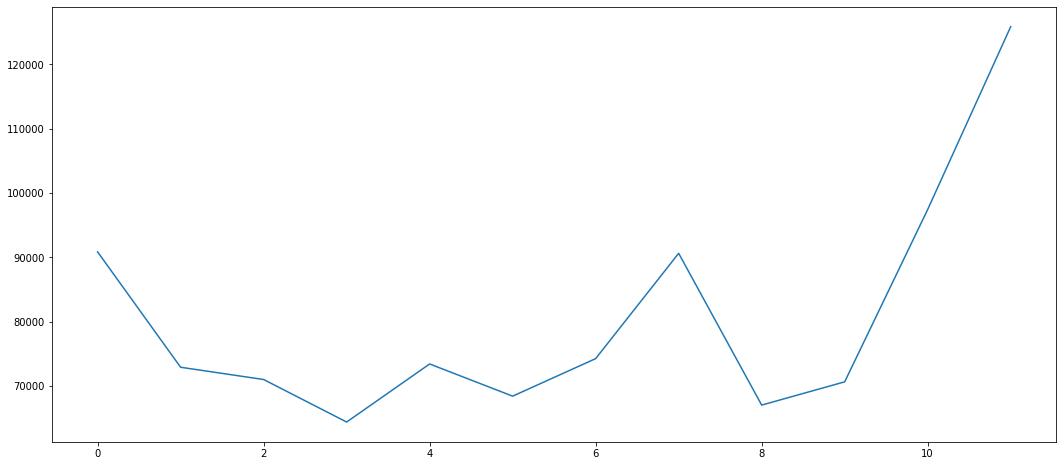

In [268]:
#Grabbing the values of the last row (year 2013)
list_sales = df_tablets.iloc[-1].values[:]

#Creating a list with the months
#list_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
list_months = range(1,13)

#Zipping both lists and creating a dataframe
list_of_tuples = list(zip(list_months, list_sales)) 
df_2013 = pd.DataFrame(list_of_tuples, columns = ['Period', 'Sales']) 

plt.plot(df_2013['Sales'])
plt.show()

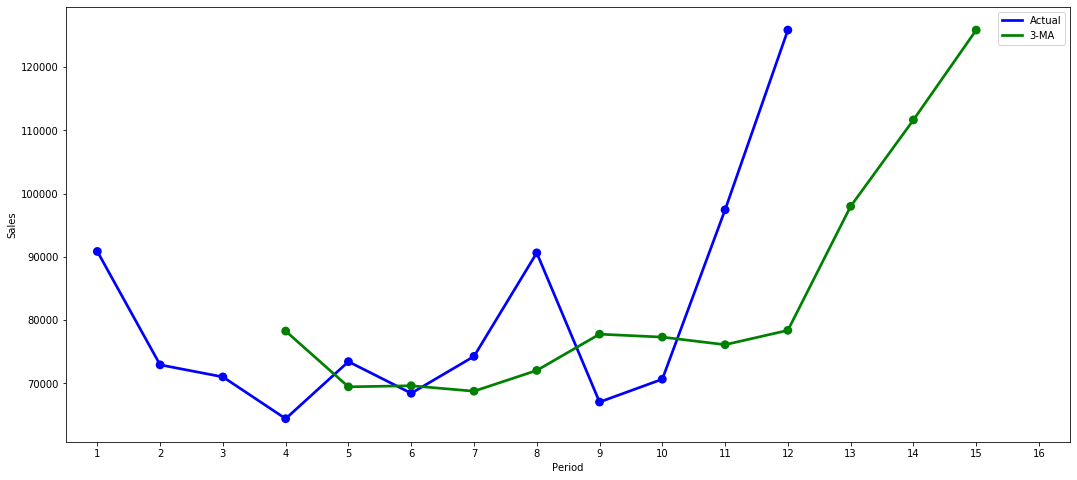

In [269]:
# Using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Period','Sales'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['Sales'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]
    
    moving_average_df['Period'] = moving_average_df['Period'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1, 1)
ma_df = moving_average(df_2013, 3, 16)
sns.pointplot(x='Period', y='Sales', data=df_2013, color='b')
sns.pointplot(x='Period', y='Sales', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df_2013)+1], labels=["Actual", "3-MA"])
plt.show()

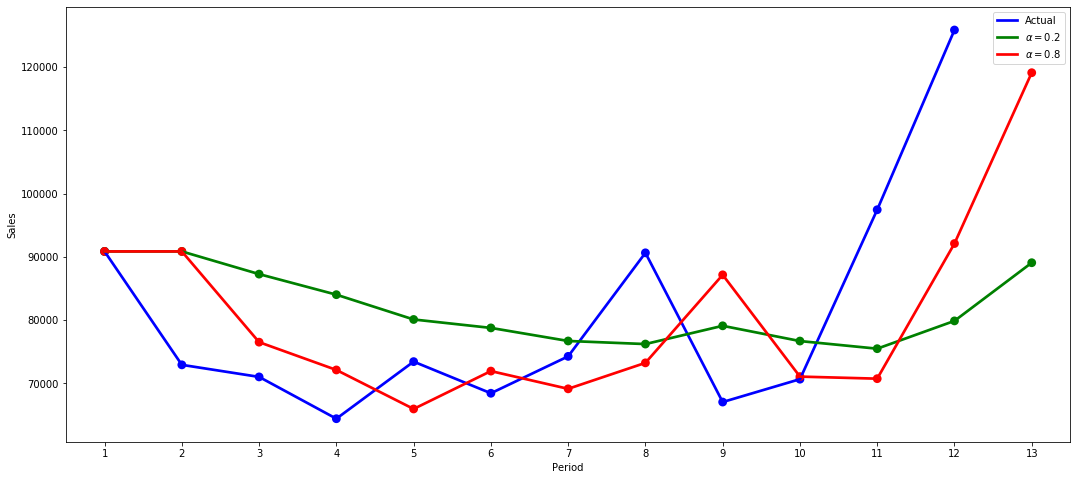

In [270]:
def exponential_smoothing(df, alpha):
    es_df = pd.DataFrame(columns=['Period','Sales'])
    es_df.loc[0] = [1, df['Sales'][0]]
    num_df = len(df)
    for m in range(0, num_df):
        sale_predict = alpha * df['Sales'][m] + (1-alpha) * es_df['Sales'][m]
        es_df.loc[m+1] = [m+2, sale_predict]
        
    es_df['Period'] = es_df['Period'].astype(int)
    return es_df

f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df_2013, 0.2)
es_df_08 = exponential_smoothing(df_2013, 0.8)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df_2013, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=es_df_02, color='g')
sns.pointplot(ax=ax, x='Period', y='Sales', data=es_df_08, color='r')

ax.legend(handles=ax.lines[::len(df_2013)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.show()

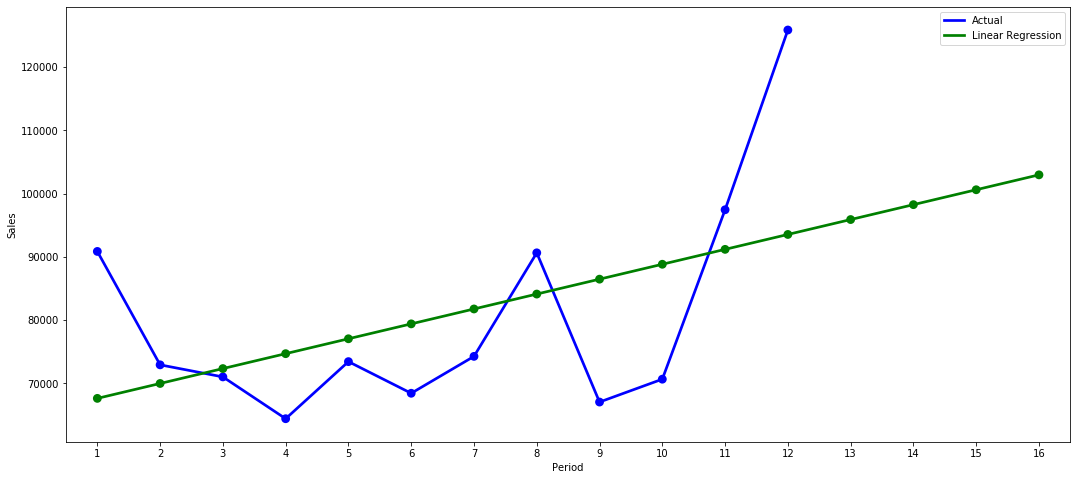

In [271]:
def linear_regression(df):
    linear_df = df.copy()
    linear_df['PeriodSales'] = linear_df['Period'] * linear_df['Sales'] 
    linear_df['Period_2'] = linear_df['Period'] * linear_df['Period']
    linear_df['Sales_2'] = linear_df['Sales'] * linear_df['Sales']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['PeriodSales'] - len(df) * linear_mean['Period'] * linear_mean['Sales']) \
        / (linear_sum['Period_2']- len(df) * linear_mean['Period'] * linear_mean['Period'])
    a = linear_mean['Sales'] - b * linear_mean['Period']
    return a,b


a,b = linear_regression(df_2013)
linear_df = pd.DataFrame(columns=['Period','Sales'])
for m in range(1, 17):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df_2013, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=linear_df, color='g')

ax.legend(handles=ax.lines[::len(df_2013)+2], labels=["Actual", "Linear Regression"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RankWarning: Polyfit may be poorly conditioned


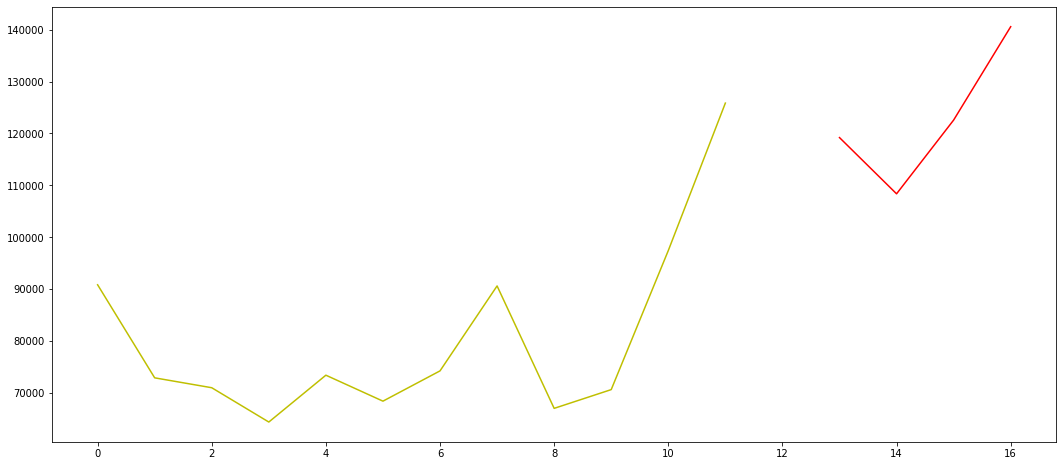

In [272]:
#season function
def get_season(row):
    if row['Period'] >= 5 and row['Period'] <= 8:
        return 'II'
    elif row['Period'] >= 9 and row['Period'] <= 12:
        return 'III'
    else:
        return 'I'
def get_seq(row):
    return row['Period']%4 and row['Period']%4 or 4

def predict_with_seasonality(df, months):
    new_df = df.copy()
    new_df['Season'] = new_df.apply(get_season, axis=1)
    new_df['Seq'] = new_df.apply(get_seq, axis=1)
    
    season_df = pd.DataFrame((new_df.pivot('Seq','Season')['Sales']).to_records())
    season_df.index = season_df['Seq']
    season_df = season_df.drop(['Seq'], axis=1)
    
    avg_df = season_df.apply(np.mean)
    
    seasonal_index_df = pd.DataFrame(columns=['I','II','III'])
    seasonal_index_df['I'] = season_df['I']/avg_df['I']
    seasonal_index_df['II'] = season_df['II']/avg_df['II']
    seasonal_index_df['III'] = season_df['III']/avg_df['III']
    seasonal_index_df['Avg'] = seasonal_index_df.mean(axis=1)
    
    season = np.array([1,2,3])
    avg_arr = np.array([avg_df['I'], avg_df['II'], avg_df['III']])
    fit = np.polyfit(season, avg_arr, 3)
    poly = np.poly1d(fit)
    average_predict = poly(4)
    forecast_df = pd.DataFrame(columns=['Period','Sales'])
    
    forecast_df['Sales'] = seasonal_index_df['Avg']*average_predict
    forecast_df['Period'] = months
#     forecast_df.index = forecast_df['Period']
    forecast_df.index = np.array(months) - 1
    return forecast_df

season_df = predict_with_seasonality(df_2013, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.plot(df_2013['Sales'], c='y')
plt.plot(season_df['Period'], season_df['Sales'], c='r')
plt.show()

In [273]:
''' THIS COULD BE THE ANSWER TO QUESTION 4 (OPTIONAL)'''

##### TRYING TO CREATE A CALPLOT

# df_tab_copy = df_tab.copy()

# df_tab_copy.set_index('timeFormat', inplace=True)

# df_tab_copy.dropna()

# #df_tab_copy['count'] = list_ones

# import calplot # https://github.com/tomkwok/calplot
# # plot

# calplot.calplot(df_tab_copy['price'], how='sum')

' THIS COULD BE THE ANSWER TO QUESTION 4 (OPTIONAL)'

In [274]:
'''GABY: these fields are already created in the beginning, you could use them '''

### Average Daily Job Count by Day of the Week

# Create a column for the Day of the Week based off the date
df_tab['DayofWeek'] = df_tab['timeFormat'].dt.day_name()

# A list with our preferred day of the week order
dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group job posts by day of the week count and order correctly(Mon-Sun) with DayofWeek as ordered index
dayofweek_count = df_tab.groupby(df_tab['DayofWeek']).count().reindex(dayofweek_order) 
dayofweek_count 



,reviewerID,asin,reviewText,overall,summary,timeFormat,description,categories,title,price,related,brand,sentiment,helpfulRatio,month_year,hour,day_week,day_month
DayofWeek,,,,,,,,,,,,,,,,,,
Monday,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426,1426,963,1426,1426,1426,1426
Tuesday,1491,1491,1491,1491,1491,1491,1491,1491,1491,1491,1491,1491,1491,1026,1491,1491,1491,1491
Wednesday,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1034,1495,1495,1495,1495
Thursday,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1482,1024,1482,1482,1482,1482
Friday,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1429,1017,1429,1429,1429,1429
Saturday,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,945,1319,1319,1319,1319
Sunday,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,903,1288,1288,1288,1288


In [275]:
# Job posts = unique Id count
# New dataframe with Id and day of week as index
DayOfWeekGroupBy = pd.DataFrame(dayofweek_count['reviewerID'])
DayOfWeekGroupBy

,reviewerID
DayofWeek,
Monday,1426
Tuesday,1491
Wednesday,1495
Thursday,1482
Friday,1429
Saturday,1319
Sunday,1288


In [276]:
# New column for count how many unique dates per day of week
# Groupby DayofWeek and count unique Dates aka unique dates per DayofWeek
DayOfWeekGroupBy['DayofWeekCount'] = df_tab.groupby('DayofWeek')['timeFormat'].nunique()
DayOfWeekGroupBy.head(15)

,reviewerID,DayofWeekCount
DayofWeek,,
Monday,1426,207
Tuesday,1491,205
Wednesday,1495,205
Thursday,1482,202
Friday,1429,206
Saturday,1319,203
Sunday,1288,211


In [277]:
DayOfWeekGroupBy['AverageDailyJobPosts'] = DayOfWeekGroupBy['reviewerID'] / DayOfWeekGroupBy['DayofWeekCount']
DayOfWeekGroupBy

,reviewerID,DayofWeekCount,AverageDailyJobPosts
DayofWeek,,,
Monday,1426,207,6.888889
Tuesday,1491,205,7.273171
Wednesday,1495,205,7.292683
Thursday,1482,202,7.336634
Friday,1429,206,6.936893
Saturday,1319,203,6.497537
Sunday,1288,211,6.104265
